In [3]:
import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()

# Load the dataset
data = pd.read_csv(r"C:\Users\suraj\OneDrive\Desktop\internship applications project\oasis_infobyte\sales_prediction\Advertising.csv")

# Display the head of the dataframe
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9




The columns represent advertising budgets for TV, radio, and newspaper, along with the sales figures. The 'Unnamed: 0' column appears to be an index, which we can remove for clarity.

Next, I will perform exploratory data analysis to summarize the main characteristics of the data and visualize the distribution of individual features and their relationship with sales. Let's proceed with that.

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

Missing values in each column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


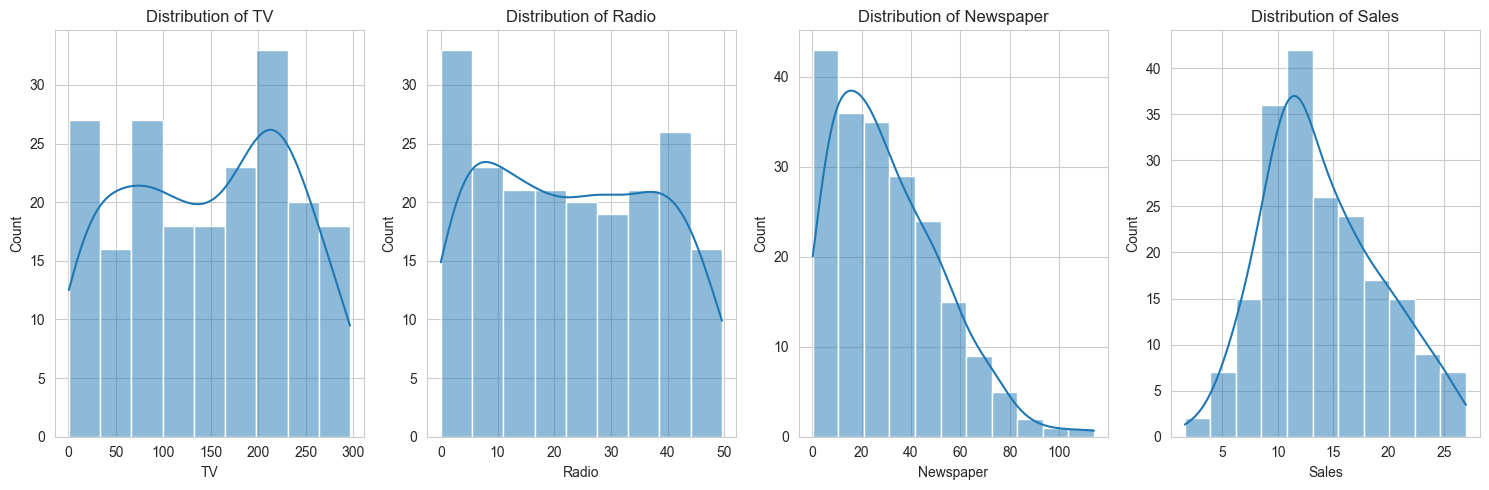

c:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


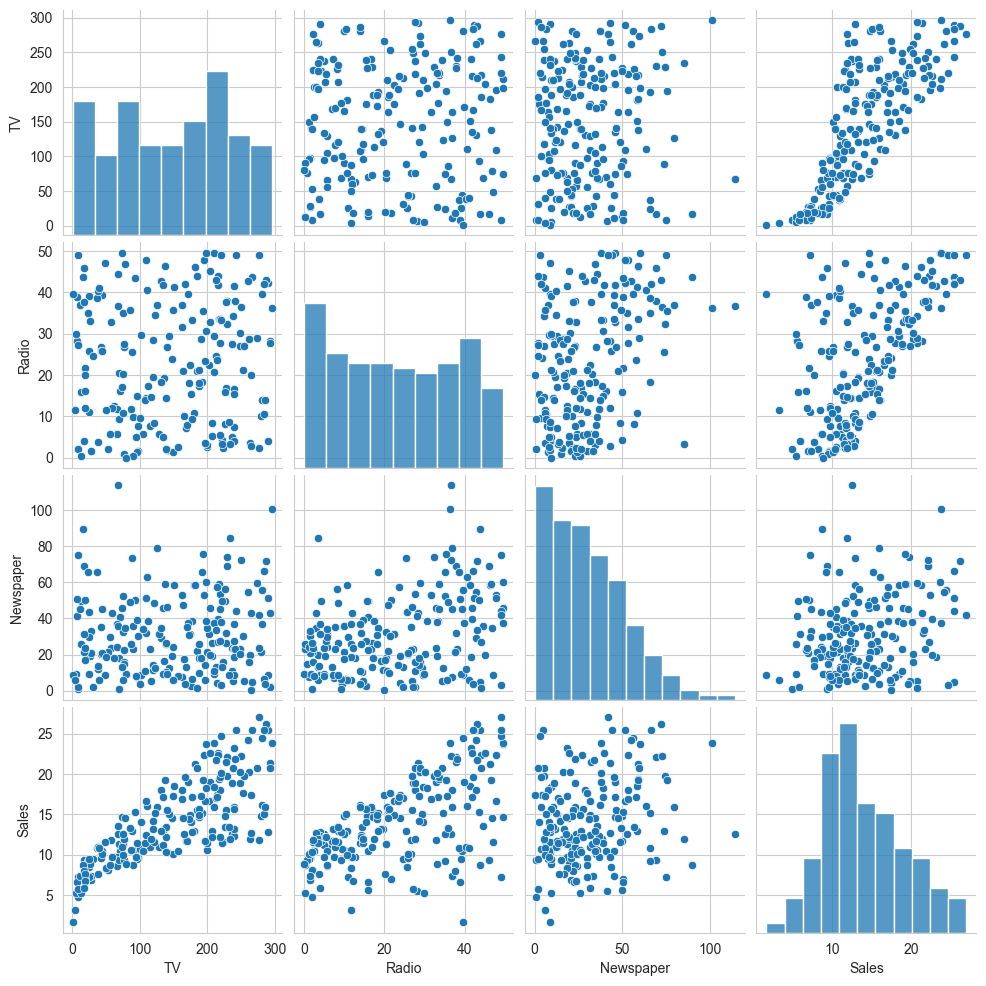

In [4]:
# Remove the 'Unnamed: 0' column as it's just an index
data.drop(columns=['Unnamed: 0'], inplace=True)

# Descriptive statistics
statistics = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Output the descriptive statistics and missing values
print(statistics)
print('\nMissing values in each column:')
print(missing_values)

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Histograms for distributions
plt.figure(figsize=(15, 5))
for i, column in enumerate(['TV', 'Radio', 'Newspaper', 'Sales'], start=1):
    plt.subplot(1, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title('Distribution of ' + column)
plt.tight_layout()
plt.show()

# Pairplot to visualize the relationship between features and sales
sns.pairplot(data)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = data.drop('Sales', axis=1)
y = data['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the training and test sets
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (160, 3) (160,)
Test set: (40, 3) (40,)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_reg.predict(X_test)

# Calculate the performance metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Output the performance metrics
print('Linear Regression MSE:', mse_linear)
print('Linear Regression R-squared:', r2_linear)

Linear Regression MSE: 3.1740973539761033
Linear Regression R-squared: 0.899438024100912


In [7]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)

# Train the model
ridge_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate the performance metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Output the performance metrics
print('Ridge Regression MSE:', mse_ridge)
print('Ridge Regression R-squared:', r2_ridge)

Ridge Regression MSE: 3.174094812092732
Ridge Regression R-squared: 0.89943810463304


In [8]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_reg = Lasso(alpha=0.1)

# Train the model
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_reg.predict(X_test)

# Calculate the performance metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Output the performance metrics
print('Lasso Regression MSE:', mse_lasso)
print('Lasso Regression R-squared:', r2_lasso)

Lasso Regression MSE: 3.1705218127881336
Lasso Regression R-squared: 0.8995513046486308




The Lasso Regression model has the following performance metrics on the test set:

- Lasso Regression MSE: 3.1705218127881336
- Lasso Regression R-squared: 0.8995513046486308

The Lasso Regression model performs slightly better than both the Linear and Ridge Regression models, with a marginally lower MSE and a slightly higher R-squared value.

Next, I will proceed with training and evaluating the Decision Tree Regression model.

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regression model
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_decision_tree = decision_tree_reg.predict(X_test)

# Calculate the performance metrics
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Output the performance metrics
print('Decision Tree Regression MSE:', mse_decision_tree)
print('Decision Tree Regression R-squared:', r2_decision_tree)

Decision Tree Regression MSE: 2.175
Decision Tree Regression R-squared: 0.9310914968293178




The Decision Tree Regression model has the following performance metrics on the test set:

- Decision Tree Regression MSE: 2.175
- Decision Tree Regression R-squared: 0.9310914968293178

This model shows an improvement over the previous regression models, with a lower MSE and a higher R-squared value, indicating a better fit to the data.

Now, I will train and evaluate the Random Forest Regression model.

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regression model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_random_forest = random_forest_reg.predict(X_test)

# Calculate the performance metrics
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Output the performance metrics
print('Random Forest Regression MSE:', mse_random_forest)
print('Random Forest Regression R-squared:', r2_random_forest)

Random Forest Regression MSE: 0.5907322499999988
Random Forest Regression R-squared: 0.9812843792541843


In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regression model
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_gradient_boosting = gradient_boosting_reg.predict(X_test)

# Calculate the performance metrics
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

# Output the performance metrics
print('Gradient Boosting Regression MSE:', mse_gradient_boosting)
print('Gradient Boosting Regression R-squared:', r2_gradient_boosting)

Gradient Boosting Regression MSE: 0.5325817328183275
Gradient Boosting Regression R-squared: 0.9831267080346855


In [12]:
from sklearn.model_selection import GridSearchCV

# Define a grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the grid search model
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Output the best parameters
print('Best parameters found by grid search:', best_params)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Best parameters found by grid search: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}




The grid search for hyperparameter tuning of the Gradient Boosting Regression model has completed, and the best parameters found are:

- Learning Rate: 0.2
- Max Depth: 4
- Max Features: None (use all features)
- Min Samples Leaf: 1
- Min Samples Split: 4
- Number of Estimators: 100

With these optimized parameters, the next step is to retrain the Gradient Boosting model using these parameters and evaluate its performance on the test set.

In [13]:
# Retrain the Gradient Boosting model with the best parameters
best_gradient_boosting_reg = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Train the model
best_gradient_boosting_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_best_gradient_boosting = best_gradient_boosting_reg.predict(X_test)

# Calculate the performance metrics
mse_best_gradient_boosting = mean_squared_error(y_test, y_pred_best_gradient_boosting)
r2_best_gradient_boosting = r2_score(y_test, y_pred_best_gradient_boosting)

# Output the performance metrics
print('Optimized Gradient Boosting Regression MSE:', mse_best_gradient_boosting)
print('Optimized Gradient Boosting Regression R-squared:', r2_best_gradient_boosting)

Optimized Gradient Boosting Regression MSE: 0.6011540205003613
Optimized Gradient Boosting Regression R-squared: 0.9809541959872563


In [14]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_gradient_boosting_reg, X_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

# Output the cross-validation results
print('Cross-validation R-squared scores:', cv_scores)
print('Mean cross-validation R-squared:', cv_mean)
print('Standard deviation of cross-validation R-squared:', cv_std)

Cross-validation R-squared scores: [0.97926589 0.96089313 0.98129873 0.98100461 0.96453321]
Mean cross-validation R-squared: 0.9733991117962253
Standard deviation of cross-validation R-squared: 0.008828029808761685


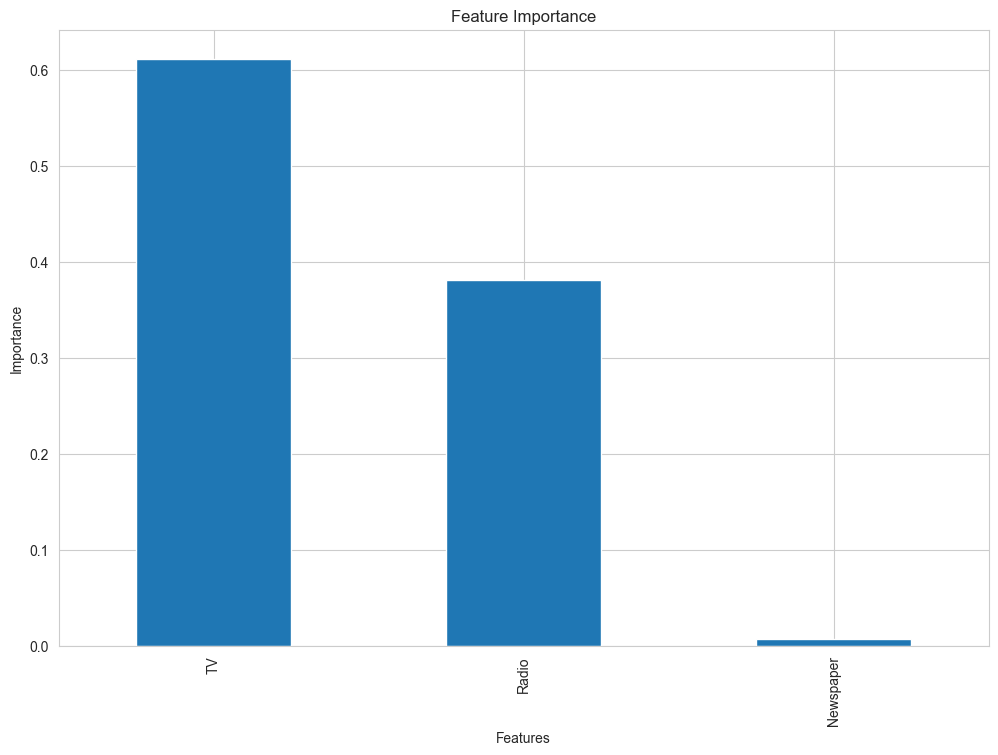

TV           0.611687
Radio        0.381184
Newspaper    0.007130
dtype: float64


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_gradient_boosting_reg.feature_importances_

# Convert the feature importances to a pandas series
features = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_features = features.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sorted_features.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Output the sorted feature importances
print(sorted_features)



Given the insights from the feature importance analysis, it would be beneficial to explore the relationship between the most important features (TV and Radio) and sales in more depth. This could involve:

- Visualizing the relationship between TV/Radio advertising budgets and sales to understand the nature of their impact.
- Investigating the interaction effects between TV and Radio advertising to see if their combined effect on sales is different from their individual effects.
- Analyzing the residuals of the model to ensure there are no patterns suggesting heteroscedasticity or non-linearity that the model is not capturing.

Let's start by visualizing the relationship between TV/Radio advertising and sales.

c:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


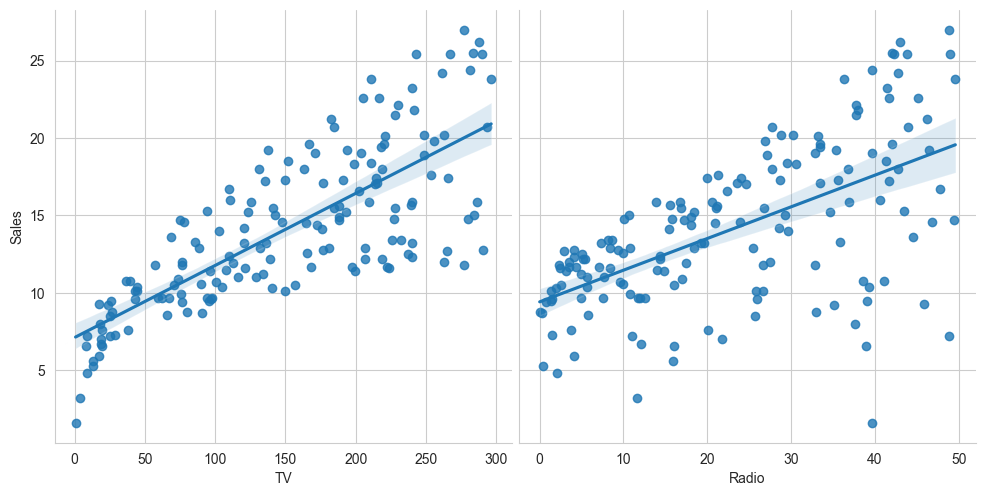

In [16]:
import seaborn as sns

# Create a DataFrame with TV, Radio, and Sales
feature_sales_df = pd.DataFrame(data={'TV': X_train['TV'], 'Radio': X_train['Radio'], 'Sales': y_train})

# Pairplot to visualize the relationships
sns.pairplot(feature_sales_df, x_vars=['TV', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='reg')
plt.show()



The pairplot above visualizes the relationships between TV and Radio advertising budgets and sales. Both TV and Radio show a positive correlation with sales, as indicated by the upward trend in the scatter plots with the regression lines. This aligns with the feature importance results, confirming that higher investments in TV and Radio advertising are associated with increased sales.

Next, I will investigate the interaction effects between TV and Radio advertising on sales.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction term between TV and Radio
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interaction = poly.fit_transform(X_train[['TV', 'Radio']])

# Fit the model with the interaction term
interaction_model = LinearRegression()
interaction_model.fit(X_train_interaction, y_train)

# Predict on the training set
y_pred_interaction = interaction_model.predict(X_train_interaction)

# Calculate the performance metrics
mse_interaction = mean_squared_error(y_train, y_pred_interaction)
r2_interaction = r2_score(y_train, y_pred_interaction)

# Output the performance metrics
print('Interaction Model MSE:', mse_interaction)
print('Interaction Model R-squared:', r2_interaction)

# Get the coefficients for the interaction term
interaction_coefficients = interaction_model.coef_

# Output the coefficients for the interaction term
print('Interaction term coefficient:', interaction_coefficients[2])

Interaction Model MSE: 0.8921936140146899
Interaction Model R-squared: 0.9656005161110535
Interaction term coefficient: 0.0010502012429537619




The interaction model, which includes an interaction term between TV and Radio advertising, has the following performance metrics:

- Interaction Model MSE: 0.8921936
- Interaction Model R-squared: 0.9656005

The coefficient for the interaction term is approximately 0.0010502, indicating a small but positive interaction effect between TV and Radio advertising on sales. This suggests that the combined effect of TV and Radio advertising on sales is slightly greater than the sum of their individual effects.

To complete the analysis, I will now analyze the residuals of the optimized Gradient Boosting model to check for any patterns that might suggest areas for improvement.

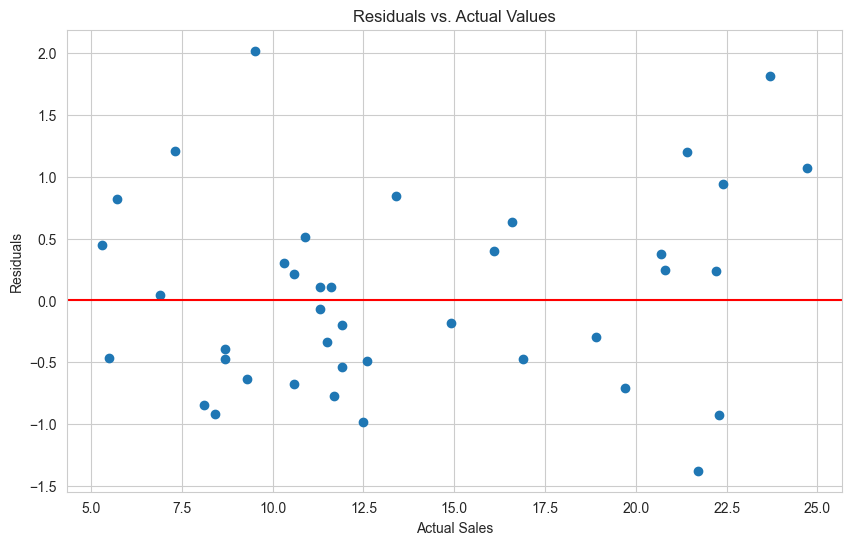

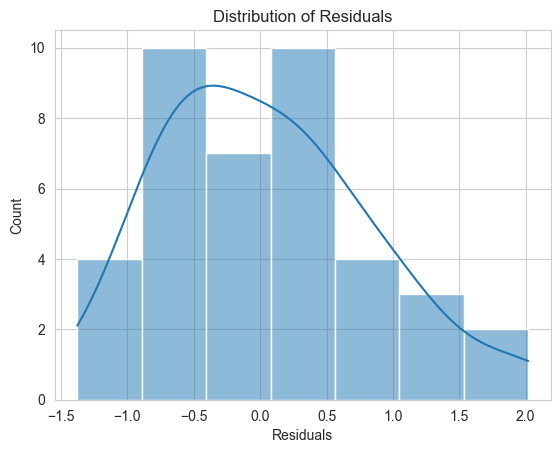

count    40.000000
mean      0.044771
std       0.783908
min      -1.378122
25%      -0.503660
50%      -0.011261
75%       0.462614
max       2.020298
Name: Sales, dtype: float64


In [18]:
# Calculate residuals
residuals = y_test - y_pred_best_gradient_boosting

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Check for normality of residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# Output the descriptive statistics of the residuals
print(residuals.describe())